## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
from datetime import datetime, timedelta

%matplotlib inline
import logging
!pip install cbpro
from coinbase import Coinbase
from mysecrets import Secrets

from IPython.core.debugger import set_trace
from IPython.display import display, Markdown, Latex

# Section I - Crypto Comparison

## Object creation

In [2]:
products = ['BTC-USD', 'ETH-USD', 'FET-USD', 'DOGE-USD']
cb_objects = {}
for product in products:
    cb_objects[product] = Coinbase(product=product, 
                      logging_level=logging.WARNING)
    print(f"Current {product:>8} price [USD]: {Coinbase.getPrice(product):>9.2f}")



Current  BTC-USD price [USD]:  46073.01
Current  ETH-USD price [USD]:   3410.92
Current  FET-USD price [USD]:      1.02
Current DOGE-USD price [USD]:      0.25


## 3M

## BTC-USD

         Time     Close        Buy       Sell
7  2021-06-18  35841.81      0.000 -10539.762
18 2021-06-29  35904.28  10539.762      0.000
23 2021-07-04  35284.05  10539.762      0.000
42 2021-07-23  33647.26  10539.762      0.000
80 2021-08-30  46993.71      0.000 -10539.762
88 2021-09-07  46894.50      0.000 -10539.762


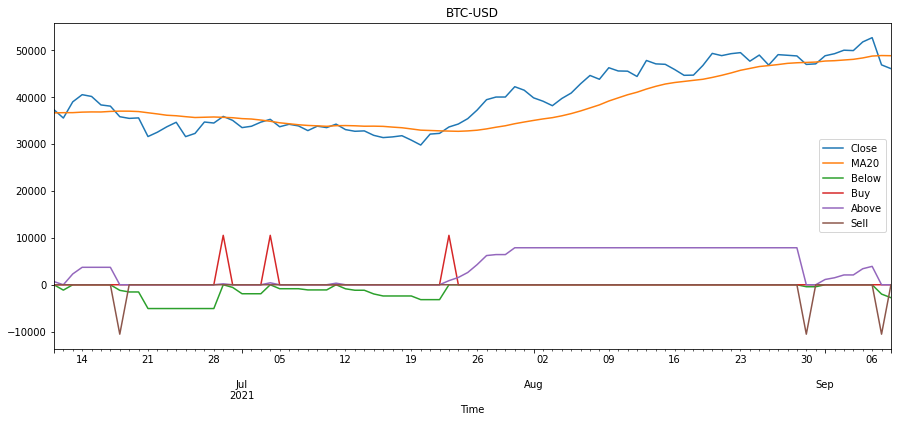

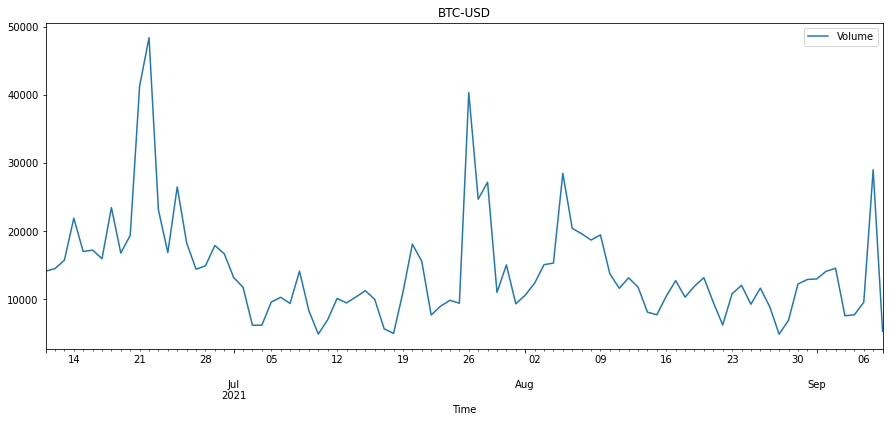

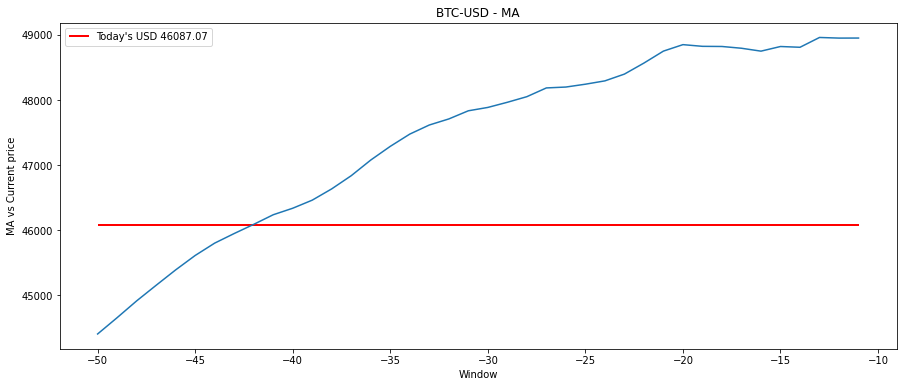

## ETH-USD

         Time    Close      Buy     Sell
19 2021-06-30  2276.72  790.434    0.000
31 2021-07-12  2030.72    0.000 -790.434
42 2021-07-23  2125.81  790.434    0.000
76 2021-08-26  3093.20    0.000 -790.434
88 2021-09-07  3436.96    0.000 -790.434


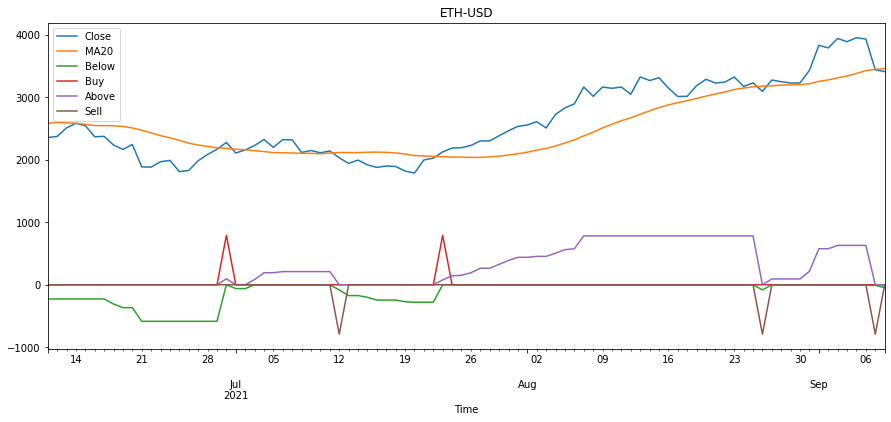

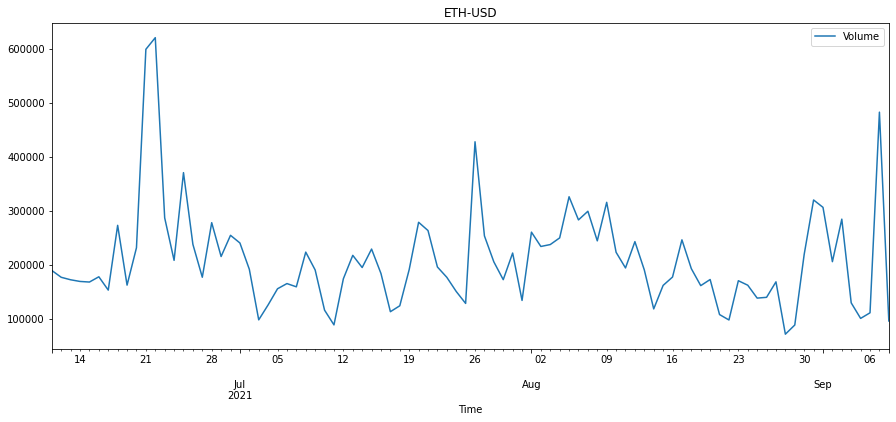

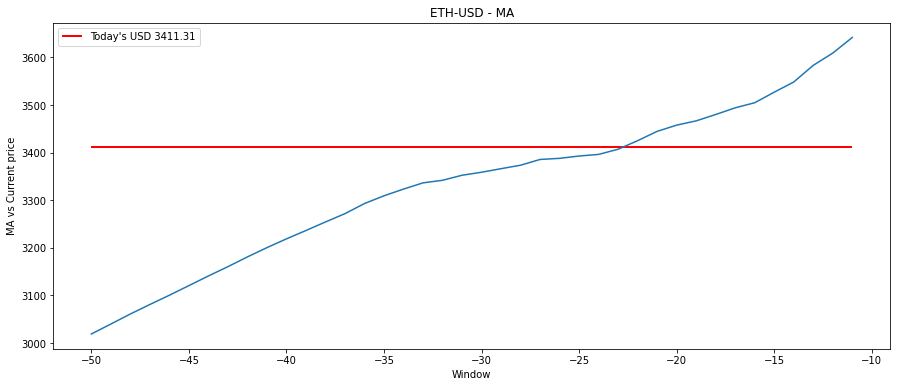

## FET-USD

Empty DataFrame
Columns: [Time, Close, Buy, Sell]
Index: []


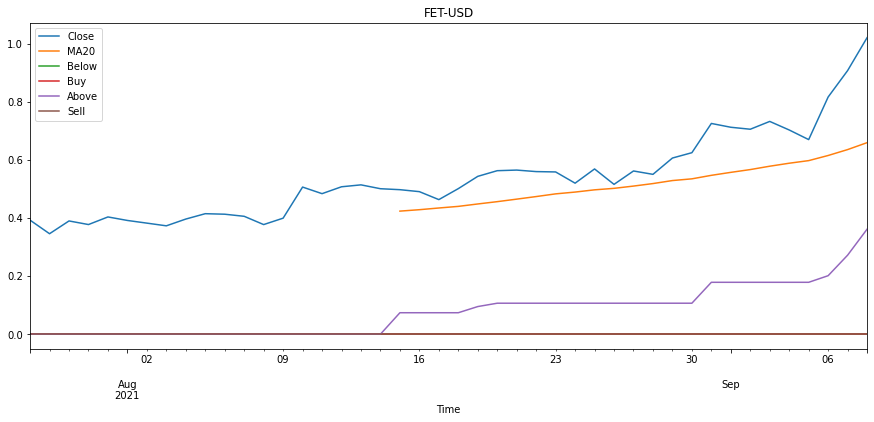

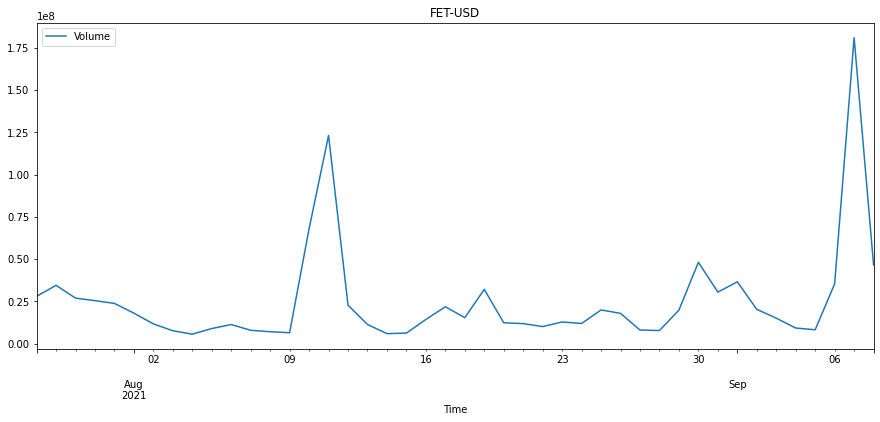

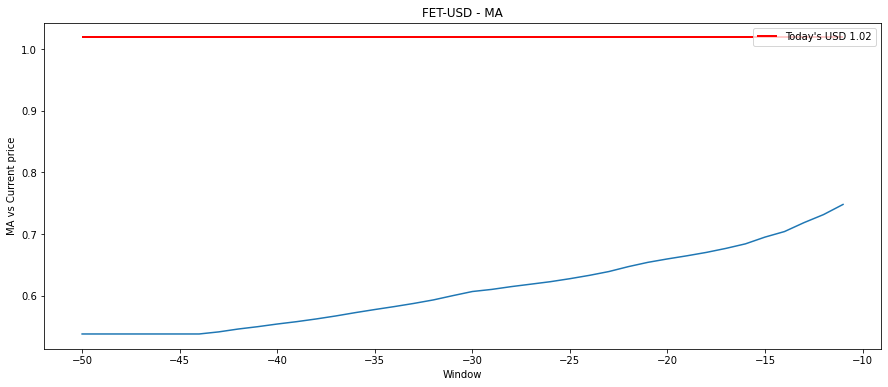

## DOGE-USD

         Time   Close      Buy     Sell
45 2021-07-26  0.2039  0.06806  0.00000
76 2021-08-26  0.2684  0.00000 -0.06806
77 2021-08-27  0.2948  0.06806  0.00000
85 2021-09-04  0.2994  0.06806  0.00000
88 2021-09-07  0.2557  0.00000 -0.06806


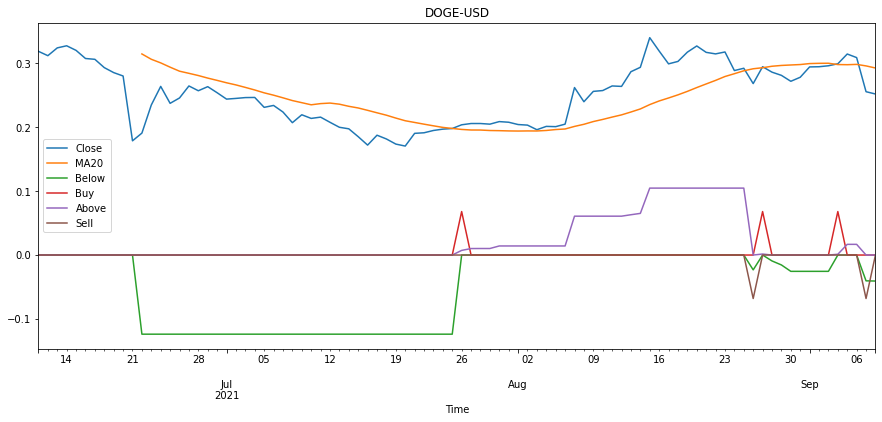

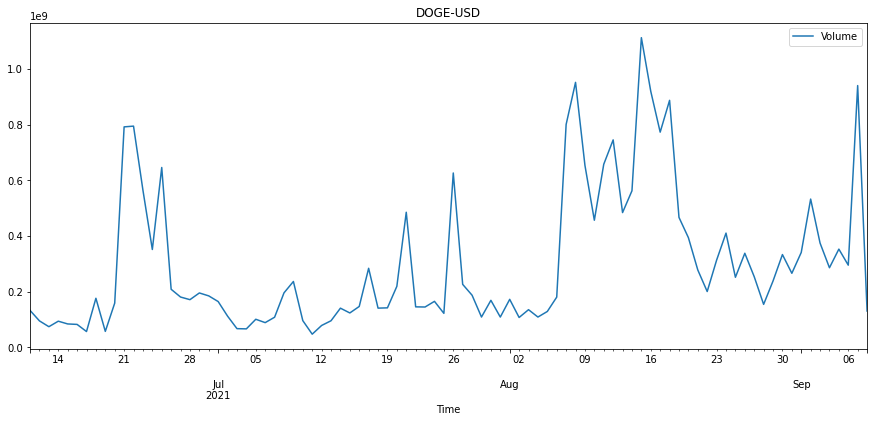

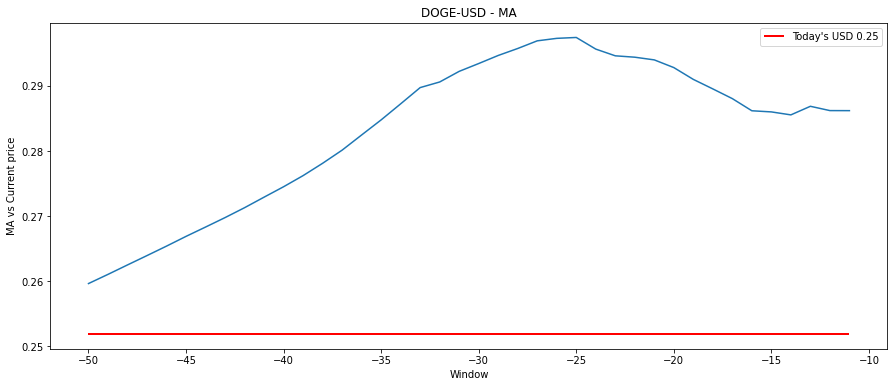

In [3]:
start_date = datetime.now() - timedelta(days=90)
end_date = datetime.now()
# moving average 20
MOVING_AVERAGE_DAYS = 20
MOVING_AVERAGE_LABEL = f"MA{MOVING_AVERAGE_DAYS}"

ABOVE_BELOW_THRESHOLD = 0.05

for product in products:
    display(Markdown(f"## {product}"))
    cb_objects[product].loadHistory(start_date = start_date, 
                           end_date = end_date,
                           granularity = 86400,
                           moving_average = MOVING_AVERAGE_DAYS)

    # "Buy" significa che il valore era sceso del x% sotto il valore attuale e ora e' tornato sopra la moving average
    # "Sell" significa che il valore era salito del x% sopra il valore attuale e ora e' tornato sotto la moving average

    cb_objects[product].calculateBuy(moving_average = MOVING_AVERAGE_DAYS, below_threshold = ABOVE_BELOW_THRESHOLD)
    cb_objects[product].calculateSell(moving_average = MOVING_AVERAGE_DAYS, above_threshold = ABOVE_BELOW_THRESHOLD)

    cb_objects[product].df[-90:].plot(title=f"{product}", x='Time', y=['Close','MA20','Below','Buy','Above','Sell'], figsize=(15,6))
    buy_and_sell = cb_objects[product].df.loc[(cb_objects[product].df['Buy']!=0) | (cb_objects[product].df['Sell']!=0),['Time','Close','Buy','Sell']]
    print(buy_and_sell)
    cb_objects[product].df[-90:].plot(title=f"{product}", x='Time', y=['Volume'], figsize=(15,6))
    plt.show()

    # Moving average
    df_ma = pd.DataFrame({'Window': range(-50, -10)})
    df_ma['MA'] = df_ma.apply(lambda row: cb_objects[product].df['Close'][row['Window']:].mean(), axis=1)
    fig, ax = plt.subplots(figsize=(15,6))
    ax.plot(df_ma['Window'], df_ma['MA'])
    current_price = Coinbase.getPrice(product)
    ax.hlines(y=current_price, xmin=df_ma['Window'].min(), xmax=df_ma['Window'].max(), linewidth=2, color='r', label=f"Today's USD {current_price:.2f}")
    ax.legend()
    plt.title(f"{product} - MA")
    plt.xlabel('Window')
    plt.ylabel('MA vs Current price')
    plt.show()





# Section II - Back Simulation 2Y

## Object creation

In [4]:
cb_btc_usd = Coinbase(product='BTC-USD', 
                      logging_level=logging.WARNING,
                      products_file='coinbase_products.json')

cb_eth_usd = Coinbase(product='ETH-USD', 
                      logging_level=logging.WARNING)

cb_doge_usd = Coinbase(product='DOGE-USD', 
                      logging_level=logging.WARNING)

## Backsimulation 2Y

## BTC-USD

Creating dataframe for BTC-USD from 2020-01-01T00:00:00 to 2021-09-08T06:17:19.672329


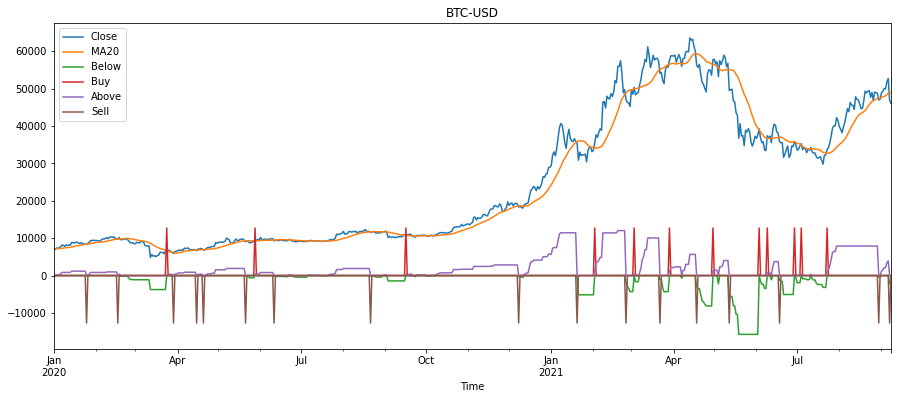

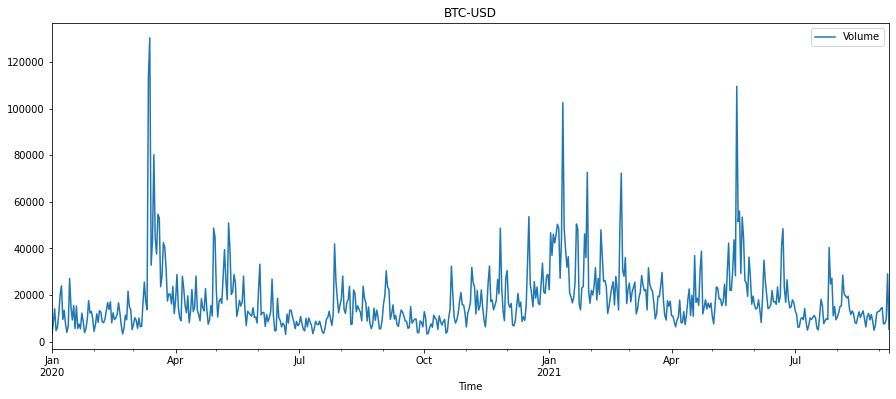

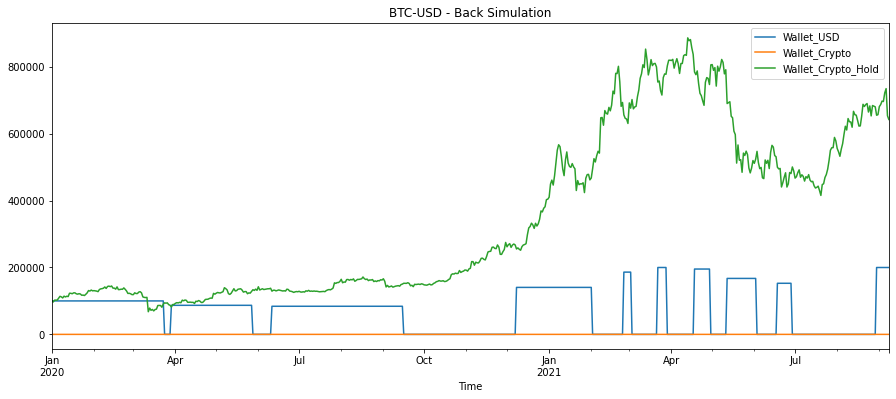

## ETH-USD

Creating dataframe for BTC-USD from 2020-01-01T00:00:00 to 2021-09-08T06:17:19.672329


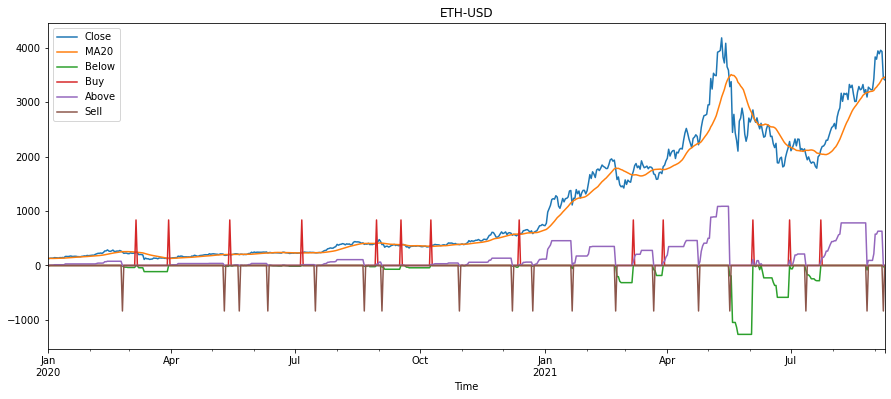

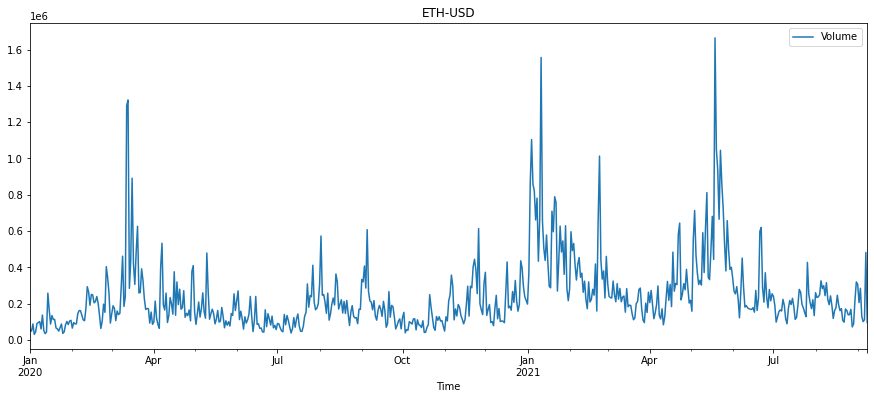

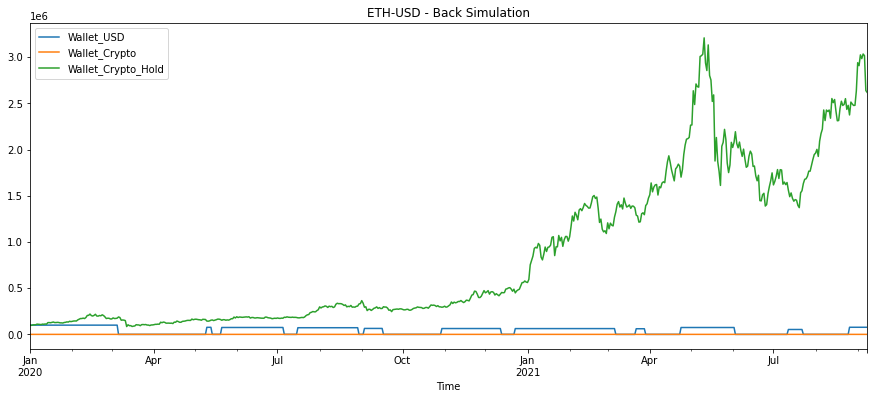

## FET-USD

Creating dataframe for BTC-USD from 2020-01-01T00:00:00 to 2021-09-08T06:17:19.672329


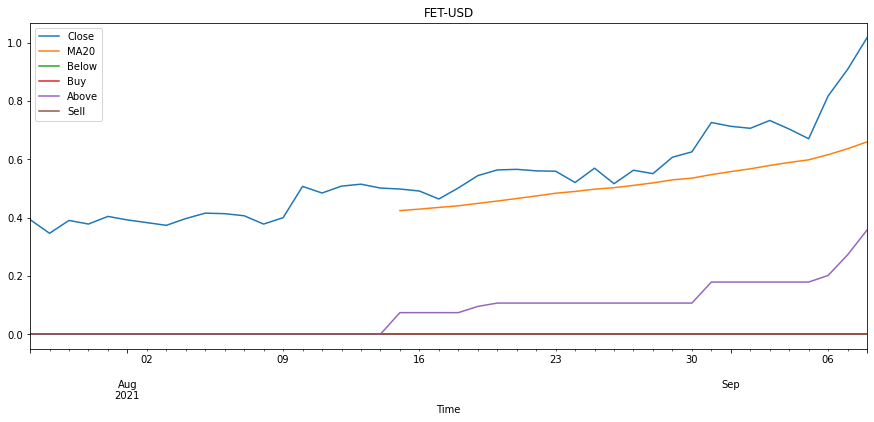

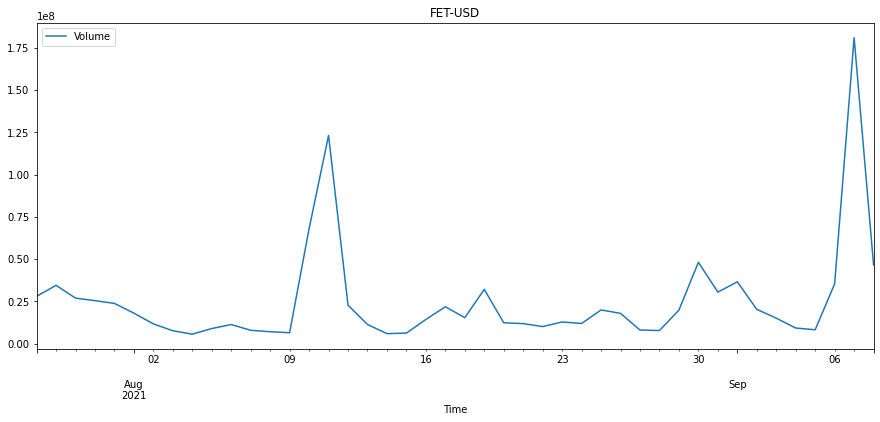

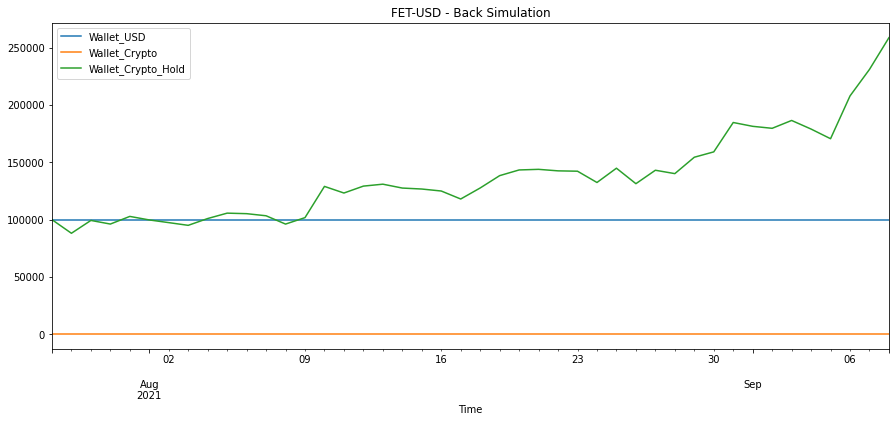

## DOGE-USD

Creating dataframe for BTC-USD from 2020-01-01T00:00:00 to 2021-09-08T06:17:19.672329


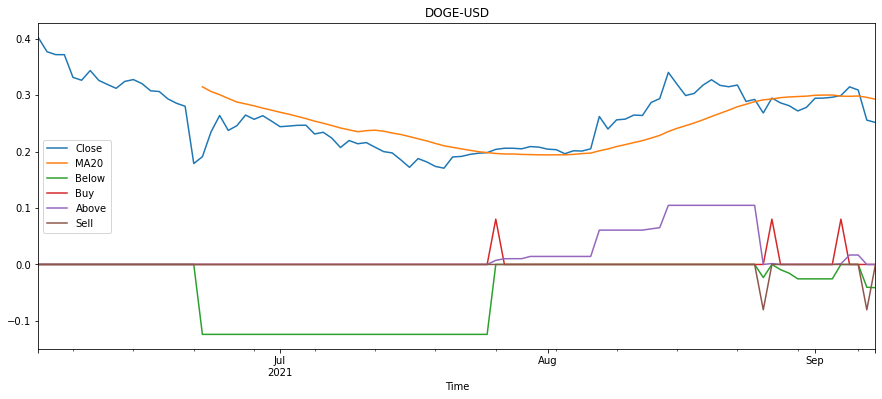

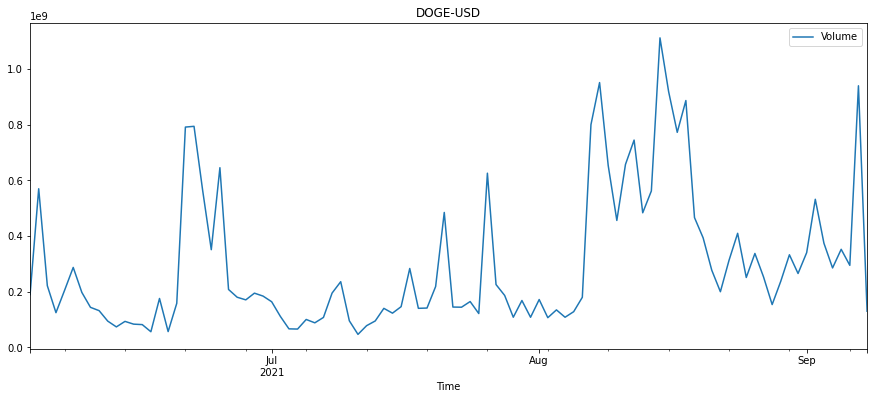

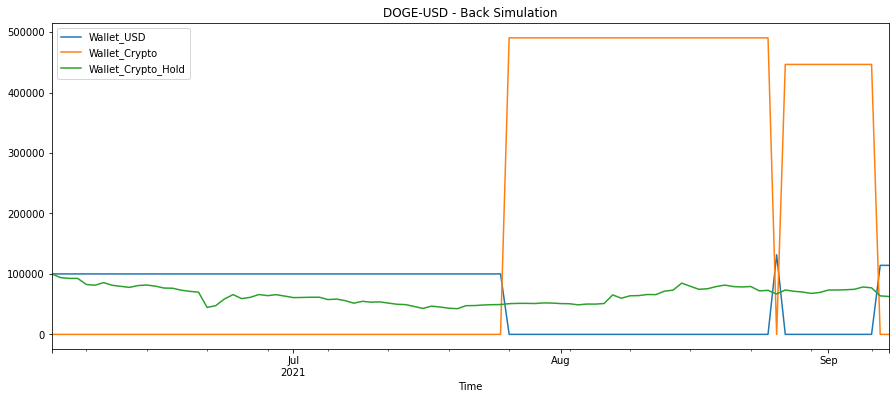

In [5]:
start_date = datetime(2020, 1, 1)
end_date = datetime.now()
#start_date = datetime.strptime(config.START_DATE, '%Y-%m-%d')
#end_date = datetime.strptime(config.END_DATE, '%Y-%m-%d')

for product in products:
    display(Markdown(f"## {product}"))

    print(f"Creating dataframe for BTC-USD from {start_date.isoformat()} to {end_date.isoformat()}")
    cb_objects[product].loadHistory(start_date = start_date, 
                           end_date = end_date,
                           granularity = 86400,
                           moving_average = MOVING_AVERAGE_DAYS)

    # "Buy" significa che il valore era sceso del x% sotto il valore attuale e ora e' tornato sopra la moving average
    # "Sell" significa che il valore era salito del x% sopra il valore attuale e ora e' tornato sotto la moving average

    cb_objects[product].calculateBuy(moving_average = MOVING_AVERAGE_DAYS, below_threshold = ABOVE_BELOW_THRESHOLD)
    cb_objects[product].calculateSell(moving_average = MOVING_AVERAGE_DAYS, above_threshold = ABOVE_BELOW_THRESHOLD)
    cb_objects[product].backSimulate(initial_amount = 100000)

    #%matplotlib inline
    cb_objects[product].df.plot(title=product, x='Time', y=['Close','MA20','Below','Buy','Above','Sell'], figsize=(15,6))
    plt.show()
    cb_objects[product].df.plot(title=product, x='Time', y=['Volume'], figsize=(15,6))
    plt.show()
    cb_objects[product].df.plot(title=f"{product} - Back Simulation", x='Time', y=['Wallet_USD','Wallet_Crypto','Wallet_Crypto_Hold'], figsize=(15,6))
    plt.show()


In [6]:
#cb_btc_usd.df[cb_btc_usd.df['Buy']>0 || cb_btc_usd.df['Sell']>0]

cb_btc_usd.df.loc[(cb_btc_usd.df['Buy']>0) | (cb_btc_usd.df['Sell']>0),['Time','Close','Buy','Sell']]

AttributeError: 'NoneType' object has no attribute 'loc'

## ETH-USD 2Y

In [ ]:
print(f"Creating dataframe for ETH-USD from {start_date.isoformat()} to {end_date.isoformat()}")
cb_eth_usd.loadHistory(start_date = start_date, 
                       end_date = end_date,
                       granularity = 86400,
                       moving_average = MOVING_AVERAGE_DAYS)

# "Buy" significa che il valore era sceso del x% sotto il valore attuale e ora e' tornato sopra la moving average
# "Sell" significa che il valore era salito del x% sopra il valore attuale e ora e' tornato sotto la moving average

cb_eth_usd.calculateBuy(moving_average = MOVING_AVERAGE_DAYS, below_threshold = ABOVE_BELOW_THRESHOLD)
cb_eth_usd.calculateSell(moving_average = MOVING_AVERAGE_DAYS, above_threshold = ABOVE_BELOW_THRESHOLD)
cb_eth_usd.backSimulate(initial_amount = 100000)
      
%matplotlib inline
cb_eth_usd.df.plot(title='ETH-USD', x='Time', y=['Close','MA20','Below','Buy','Above','Sell'], figsize=(15,6))
cb_eth_usd.df.plot(title='ETH-USD', x='Time', y=['Volume'], figsize=(15,6))
cb_eth_usd.df.plot(title='ETH-USD - Back Simulation', x='Time', y=['Wallet_USD','Wallet_Crypto','Wallet_Crypto_Hold'], figsize=(15,6))

## 1D

In [ ]:
cb_btc_usd.loadHistory(start_date=datetime.now() - timedelta(days=1), 
                       end_date=datetime.now(), 
                       granularity=60)
%matplotlib inline
cb_btc_usd.df.plot(title='BTC-USD - 1 day', x='Time', y=['High','Low'], figsize=(15,6))
cb_btc_usd.df.plot(title='BTC-USD - 1 day', x='Time', y=['Volume'], figsize=(15,6))

## Sandbox URLs
When testing your API connectivity, make sure to use the following URLs.

Website
[https://public.sandbox.pro.coinbase.com](https://public.sandbox.pro.coinbase.com)

REST API
[https://api-public.sandbox.pro.coinbase.com](https://api-public.sandbox.pro.coinbase.com)

Websocket Feed
[wss://ws-feed-public.sandbox.pro.coinbase.com](wss://ws-feed-public.sandbox.pro.coinbase.com)

FIX API
tcp+ssl://fix-public.sandbox.pro.coinbase.com:4198

In [ ]:
cb_btc_usd.public_client.get_product_order_book(cb_btc_usd.product)

In [ ]:
cb_btc_usd.public_client.get_product_ticker(cb_btc_usd.product)['price']

In [ ]:
Sandbox_API_Nickname = ""
Sandbox_API_